In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
train_df =  pd.read_csv("D:\\SQUAD2\\processed_train.csv")
dev_df =  pd.read_csv("D:\\SQUAD2\\processed_dev.csv")

In [20]:
train_df.head()
train_df.shape

(86821, 9)

In [21]:


# train_df = train_df.drop(columns = ["start","end","answer_span","q_count","p_count"])
# dev_df = dev_df.drop(columns = ["start","end","answer_span","q_count","p_count"])
train_df = train_df.dropna()
dev_df = dev_df.dropna()

In [22]:
train_df

question  \
0               When did Beyonce start becoming popular?   
1      What areas did Beyonce compete in when she was...   
2      When did Beyonce leave Destiny's Child and bec...   
3          In what city and state did Beyonce  grow up?    
4             In which decade did Beyonce become famous?   
...                                                  ...   
86816  In what US state did Kathmandu first establish...   
86817               What was Yangon previously known as?   
86818  With what Belorussian city does Kathmandu have...   
86819  In what year did Kathmandu create its initial ...   
86820                      What is KMC an initialism of?   

                                               paragraph  \
0      Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...   
1      Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...   
2      Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...   
3      Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...   
4      Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...   
...                                                  ...   
86816  Kathmandu Metropolitan City (KMC), in order to...   
86817  Kathmandu Metropolitan City (KMC), in order to...   
86818  Kathmandu Metropolitan City (KMC), in order to...   
86819  Kathmandu Metropolitan City (KMC), in order to...   
86820  Kathmandu Metropolitan City (KMC), in order to...   

                       answer_span  start  end  q_count  p_count  start_token  \
0                in the late 1990s    269  286        6      109         56.0   
1              singing and dancing    207  226       11      109         44.0   
2                             2003    526  530       11      109        112.0   
3                   Houston, Texas    166  180        9      109         36.0   
4                       late 1990s    276  286        7      109         58.0   
...                            ...    ...  ...      ...      ...          ...   
86816                       Oregon    229  235       11      110         38.0   
86817                      Rangoon    414  421        6      110         71.0   
86818                        Minsk    476  481        9      110         85.0   
86819                         1975    199  203       10      110         31.0   
86820  Kathmandu Metropolitan City      0   27        6      110          0.0   

       end_token  
0           59.0  
1           46.0  
2          112.0  
3           38.0  
4           59.0  
...          ...  
86816       38.0  
86817       71.0  
86818       85.0  
86819       31.0  
86820        2.0  

[85837 rows x 9 columns]

In [23]:
train_df["answer_span_len"]=train_df["answer_span"].map(lambda answer_span: len(str(answer_span).split()))
dev_df["answer_span_len"]=dev_df["answer_span"].map(lambda answer_span: len(str(answer_span).split()))

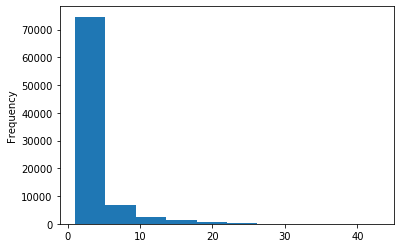

In [24]:
train_df["answer_span_len"].plot.hist()

In [25]:
train_df["answer_span_len"].describe()

count    85837.000000
mean         3.163473
std          3.382821
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         43.000000
Name: answer_span_len, dtype: float64

In [26]:
dev_df["answer_span_len"].describe()

count    5874.000000
mean        3.194416
std         3.311101
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        29.000000
Name: answer_span_len, dtype: float64

In [27]:
train_df["token_len"]=train_df.apply(lambda row: row[8]-row[7]+1,axis=1)
dev_df["token_len"]=dev_df.apply(lambda row: row[8]-row[7]+1,axis=1)

In [28]:
train_df.head()

question  \
0           When did Beyonce start becoming popular?   
1  What areas did Beyonce compete in when she was...   
2  When did Beyonce leave Destiny's Child and bec...   
3      In what city and state did Beyonce  grow up?    
4         In which decade did Beyonce become famous?   

                                           paragraph          answer_span  \
0  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...    in the late 1990s   
1  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...  singing and dancing   
2  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...                 2003   
3  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...       Houston, Texas   
4  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...           late 1990s   

   start  end  q_count  p_count  start_token  end_token  answer_span_len  \
0    269  286        6      109         56.0       59.0                4   
1    207  226       11      109         44.0       46.0                3   
2    526  530       11      109        112.0      112.0                1   
3    166  180        9      109         36.0       38.0                2   
4    276  286        7      109         58.0       59.0                2   

   token_len  
0        4.0  
1        3.0  
2        1.0  
3        3.0  
4        2.0

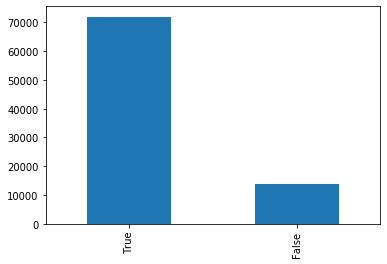

In [29]:
train_df["sanity_check"] = train_df.apply(lambda row: row[9]==row[10],axis=1)
train_df["sanity_check"].value_counts().plot.bar()

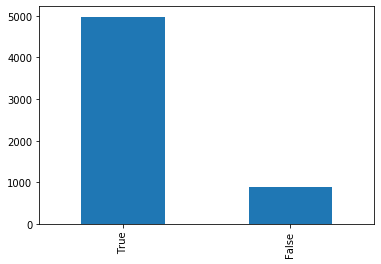

In [30]:
dev_df["sanity_check"] = dev_df.apply(lambda row: row[9]==row[10],axis=1)
dev_df["sanity_check"].value_counts().plot.bar()

In [31]:
train_df = train_df[train_df["sanity_check"]==True]
train_df.head()

question  \
0           When did Beyonce start becoming popular?   
1  What areas did Beyonce compete in when she was...   
2  When did Beyonce leave Destiny's Child and bec...   
4         In which decade did Beyonce become famous?   
6      What album made her a worldwide known artist?   

                                           paragraph          answer_span  \
0  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...    in the late 1990s   
1  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...  singing and dancing   
2  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...                 2003   
4  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...           late 1990s   
6  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...  Dangerously in Love   

   start  end  q_count  p_count  start_token  end_token  answer_span_len  \
0    269  286        6      109         56.0       59.0                4   
1    207  226       11      109         44.0       46.0                3   
2    526  530       11      109        112.0      112.0                1   
4    276  286        7      109         58.0       59.0                2   
6    505  524        8      109        108.0      110.0                3   

   token_len  sanity_check  
0        4.0          True  
1        3.0          True  
2        1.0          True  
4        2.0          True  
6        3.0          True

In [32]:
dev_df = dev_df[dev_df["sanity_check"]==True]
dev_df.head()

question  \
0               In what country is Normandy located?   
1                 When were the Normans in Normandy?   
3                          Who was the Norse leader?   
4  What century did the Normans first gain their ...   
5        Who was the duke in the battle of Hastings?   

                                           paragraph              answer_span  \
0  The Normans (Norman: Nourmands; French: Norman...                   France   
1  The Normans (Norman: Nourmands; French: Norman...  10th and 11th centuries   
3  The Normans (Norman: Nourmands; French: Norman...                    Rollo   
4  The Normans (Norman: Nourmands; French: Norman...             10th century   
5  The Norman dynasty had a major political, cult...    William the Conqueror   

   start   end  q_count  p_count  start_token  end_token  answer_span_len  \
0    159   165        6      109         34.0       34.0                1   
1     94   117       11      109         21.0       24.0                4   
3    308   313        9      109         65.0       65.0                1   
4    671   683        7      109        127.0      128.0                2   
5   1022  1043        9      109        176.0      178.0                3   

   token_len  sanity_check  
0        1.0          True  
1        4.0          True  
3        1.0          True  
4        2.0          True  
5        3.0          True

In [33]:
dev_df["start_token"] = dev_df["start_token"].map(lambda x: int(x))
dev_df["end_token"] = dev_df["end_token"].map(lambda x: int(x))

In [34]:
train_df = train_df[train_df["start_token"]<100]
train_df = train_df[train_df["end_token"]<100]

In [35]:
dev_df = dev_df[dev_df["start_token"]<100]
dev_df = dev_df[dev_df["end_token"]<100]

In [36]:
train_df.head()

question  \
0           When did Beyonce start becoming popular?   
1  What areas did Beyonce compete in when she was...   
4         In which decade did Beyonce become famous?   
7             Who managed the Destiny's Child group?   
8                     When did Beyoncé rise to fame?   

                                           paragraph          answer_span  \
0  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...    in the late 1990s   
1  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...  singing and dancing   
4  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...           late 1990s   
7  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...       Mathew Knowles   
8  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...           late 1990s   

   start  end  q_count  p_count  start_token  end_token  answer_span_len  \
0    269  286        6      109         56.0       59.0                4   
1    207  226       11      109         44.0       46.0                3   
4    276  286        7      109         58.0       59.0                2   
7    360  374        6      109         77.0       78.0                2   
8    276  286        6      109         58.0       59.0                2   

   token_len  sanity_check  
0        4.0          True  
1        3.0          True  
4        2.0          True  
7        2.0          True  
8        2.0          True

In [37]:
train_df = train_df[(train_df["answer_span_len"]<15)]
dev_df = dev_df[(dev_df["answer_span_len"]<15)]

In [38]:
train_df = train_df.drop(columns = ["start","end","answer_span","q_count","p_count","answer_span_len","token_len","sanity_check"])
dev_df = dev_df.drop(columns = ["start","end","answer_span","q_count","p_count","answer_span_len","token_len","sanity_check"])

In [39]:
train_df.dtypes

question        object
paragraph       object
start_token    float64
end_token      float64
dtype: object

In [40]:
train_df.dtypes

question        object
paragraph       object
start_token    float64
end_token      float64
dtype: object

In [41]:
train_df.describe()

start_token     end_token
count  58132.00000  58132.000000
mean      39.84198     41.334773
std       28.10171     28.168665
min        0.00000      0.000000
25%       15.00000     17.000000
50%       36.00000     37.000000
75%       62.00000     64.000000
max       99.00000     99.000000

In [42]:
dev_df.describe()

start_token    end_token
count  3980.000000  3980.000000
mean     40.893216    42.451256
std      28.390465    28.481047
min       0.000000     0.000000
25%      16.000000    17.000000
50%      37.000000    39.000000
75%      64.000000    66.000000
max      99.000000    99.000000

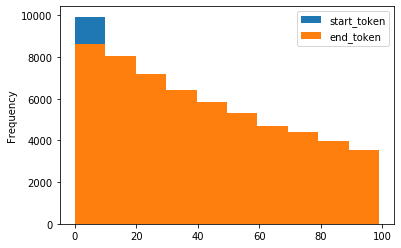

In [43]:
train_df.plot.hist()

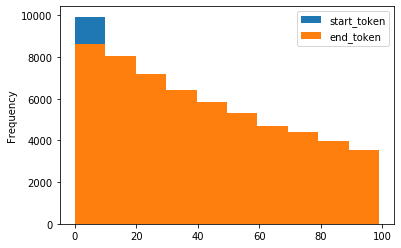

In [44]:
train_df.plot.hist()

In [45]:
# train_df = train_df.reset_index()
# dev_df = dev_df.reset_index()

In [46]:
# train_df['index'] = train_df.index
# dev_df['index'] = dev_df.index

In [47]:
train_df.dtypes

question        object
paragraph       object
start_token    float64
end_token      float64
dtype: object

In [48]:
train_df["start_token"] = train_df["start_token"].map(lambda x: int(x))
train_df["end_token"] = train_df["end_token"].map(lambda x: int(x))

In [49]:
# train_df = train_df[:10000]
# dev_df=  dev_df[:10000]

In [50]:
train_df.to_csv("D:\\SQUAD2\\processed_train_nn.csv",index=False,header=None)

In [51]:
dev_df.to_csv("D:\\SQUAD2\\processed_dev_nn.csv",index=False,header=None)